In [1]:
import polars as pl
import numpy as np

# Declarando

In [2]:
num_filas = 5_000
rng = np.random.default_rng(seed=7)

datos_edificios = {
    "metraje" : rng.exponential(scale = 300, size=num_filas),
    "año": rng.integers(low=1980, high=2024, size= num_filas),
    "tipo": rng.choice(["A", "B", "C"], size = num_filas)
}

edificios = pl.DataFrame(data=datos_edificios)
edificios

metraje,año,tipo
f64,i64,str
212.258777,1982,"""C"""
307.561004,2019,"""C"""
170.564597,2007,"""A"""
268.532959,1988,"""A"""
61.959826,2006,"""A"""
…,…,…
213.130726,1993,"""C"""
122.661835,2003,"""C"""
17.268618,2018,"""C"""


Existen métodos para explorar datos, que muchos son similares a ```pandas```. Los tipos de datos son de ```pyarrow```.

In [3]:
edificios.schema

Schema([('metraje', Float64), ('año', Int64), ('tipo', String)])

In [4]:
edificios.head()

metraje,año,tipo
f64,i64,str
212.258777,1982,"""C"""
307.561004,2019,"""C"""
170.564597,2007,"""A"""
268.532959,1988,"""A"""
61.959826,2006,"""A"""


In [5]:
edificios.describe()

statistic,metraje,año,tipo
str,f64,f64,str
"""count""",5000.0,5000.0,"""5000"""
"""null_count""",0.0,0.0,"""0"""
"""mean""",298.228337,2001.5494,null
"""std""",304.992471,12.676312,null
"""min""",0.339977,1980.0,"""A"""
"""25%""",86.042265,1990.0,null
"""50%""",200.822089,2002.0,null
"""75%""",402.872935,2012.0,null
"""max""",2792.338175,2023.0,"""C"""


# Contexto y expresiones
Expresiones son las transformaciones que se hacen en las columnas de datos, incluyendo operaciones matemáticas, agregaciones, comparaciones, manipulación de texto, etc

Un contexto se refiere al ambiente específico en que una expresión es evaluada. Existen 3 contextos principales:
* **Selección**: Seleccionar columnas de un dataframe.
* **Filtro**: Reducir al dataframe extrayendo filas que cumplan una condición.
* **Agrupación**: Hacer resúmenes de subgrupos de los datos.

In [6]:
edificios.select("metraje")

metraje
f64
212.258777
307.561004
170.564597
268.532959
61.959826
…
213.130726
122.661835
17.268618


In [7]:
edificios.select(pl.col("metraje"))

metraje
f64
212.258777
307.561004
170.564597
268.532959
61.959826
…
213.130726
122.661835
17.268618


La segunda forma usando ```pl.col``` te permite encadenar manipulaciones en la columna, por ejemplo dividir el metraje por 100

In [8]:
edificios.select(pl.col("metraje").sort() / 100)

metraje
f64
0.0034
0.003456
0.004287
0.004316
0.004514
…
20.79575
21.742617
22.888708


Podemos también filtrar

In [9]:
edificios.filter(pl.col("año") > 2015)

metraje,año,tipo
f64,i64,str
307.561004,2019,"""C"""
1015.091205,2016,"""B"""
172.599827,2022,"""A"""
220.757182,2020,"""A"""
75.103604,2016,"""C"""
…,…,…
95.661883,2019,"""B"""
516.747999,2016,"""C"""
740.445452,2023,"""B"""


In [10]:
edificios.filter(pl.col("año") > 2015).select(pl.col("año").min())

año
i64
2016


Puedo hacer agrupaciones o ```group_by```

In [11]:
(edificios.group_by("tipo")
 .agg([
     pl.mean("metraje").round(1).alias("mts promedio"),
     pl.median("año").round(1).alias("año medio"),
     pl.len()
 ])
)

tipo,mts promedio,año medio,len
str,f64,f64,u32
"""B""",297.8,2002.0,1655
"""A""",296.9,2003.0,1653
"""C""",300.0,2002.0,1692


# Lazy API
Permite hacer operaciones sin correrlas inmediatamente, eso permite optimizarlas antes de ejecución y ver potenciales errores. Además permite hacer consultas en dataframes que no caben dentro de la memoria de manera más eficiente.

```LazyFrame``` es el objeto que se usa y existen diferentes formas de crearlos

In [12]:
# creamos variable precio
datos_edificios["precio"] = rng.exponential(scale=100_000_000, size = num_filas)

edificios_lazy = pl.LazyFrame(datos_edificios)
edificios_lazy

In [19]:
lazy_query = (
    edificios_lazy
    .with_columns(
        (pl.col("precio") / pl.col("metraje")).alias("precio_m2")
    )
    .filter(pl.col("precio_m2") > 100_000)
    .filter(pl.col("año") < 2010)
)
lazy_query

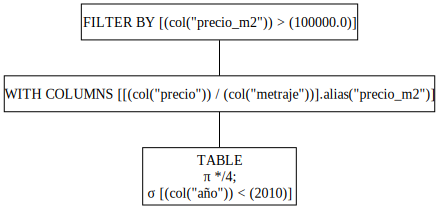

In [20]:
lazy_query.show_graph()

Esto explica que hace internamente ```polars``` para hacer la consulta.

Para ejecutarla se usa ```collect()```

In [21]:
(lazy_query.collect())

metraje,año,tipo,precio,precio_m2
f64,i64,str,f64,f64
212.258777,1982,"""C""",2.2064e7,103950.853854
170.564597,2007,"""A""",2.9574e7,173387.199516
61.959826,2006,"""A""",2.3924e8,3.8612e6
2.926088,1999,"""A""",2.0970e8,7.1666e7
842.764729,1994,"""B""",9.0218e7,107050.139414
…,…,…,…,…
27.066478,1998,"""B""",1.1429e8,4.2225e6
279.834009,1991,"""A""",1.1977e8,428018.490627
213.130726,1993,"""C""",3.7365e7,175316.233029


In [22]:
(lazy_query
 .collect()
 .select(pl.col(["precio_m2", "año"]))
)

precio_m2,año
f64,i64
103950.853854,1982
173387.199516,2007
3.8612e6,2006
7.1666e7,1999
107050.139414,1994
…,…
4.2225e6,1998
428018.490627,1991
175316.233029,1993


In [23]:
(lazy_query
 .collect()
 .select(pl.col(["precio_m2", "año"]))
 .describe()
)

statistic,precio_m2,año
str,f64,f64
"""count""",2678.0,2678.0
"""null_count""",0.0,0.0
"""mean""",3.4124e6,1994.714712
"""std""",2.4323e7,8.796034
"""min""",100027.263081,1980.0
"""25%""",241045.156977,1987.0
"""50%""",543350.608691,1995.0
"""75%""",1.4526e6,2003.0
"""max""",8.1156e8,2009.0


## Datos externos lazy
Tradicionalmente se leen todos los datos del csv o fuente externa antes de hacer cualquier procesamiento, pero con el formato lazy se minimiza lo que se lee y se procesa sólo cuando es necesario.

Ejemplo con datos de autos eléctricos yankis

In [31]:
# Bajando datos
import requests, pathlib

def bajar_archivo(file_url: str, local_file_path: pathlib.Path) -> None:
    response = requests.get(file_url)
    if response: 
        local_file_path.write_bytes(response.content)
        print (f"Archivo bajado en {local_file_path}")
    else:
        raise requests.exceptions.RequestException(f"Fallo en la descarga, código HTTP: {response.status_code}")

In [32]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
local_file_path = pathlib.Path("electric_cars.csv")
bajar_archivo(url, local_file_path)

Archivo bajado en electric_cars.csv


In [33]:
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data

In [34]:
lazy_car_data.schema

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_18048/3946365031.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  lazy_car_data.schema


Schema([('VIN (1-10)', String),
        ('County', String),
        ('City', String),
        ('State', String),
        ('Postal Code', Int64),
        ('Model Year', Int64),
        ('Make', String),
        ('Model', String),
        ('Electric Vehicle Type', String),
        ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', String),
        ('Electric Range', Int64),
        ('Base MSRP', Int64),
        ('Legislative District', Int64),
        ('DOL Vehicle ID', Int64),
        ('Vehicle Location', String),
        ('Electric Utility', String),
        ('2020 Census Tract', Int64)])

In [38]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
    )
    .group_by(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.len().alias("Number of Cars"),
    )
    .filter(pl.col("Average Electric Range") > 100)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
)

lazy_car_query.collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""WA""","""JAGUAR""",205.0,2019,234
"""TX""","""TESLA""",123.416667,2018,12
"""FL""","""TESLA""",121.833333,2019,6


No se hace ningún cálculo pesado hasta que llamamos a ```collect()```

# Integraciones
## Fuentes de datos

In [39]:
import polars as pl

data = pl.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10],
})

data.write_csv("data.csv")
data.write_ndjson("data.json")
data.write_parquet("data.parquet")

In [40]:
data_csv = pl.read_csv("data.csv")
data_csv_lazy = pl.scan_csv("data.csv")
data_csv_lazy.schema


/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_18048/2993282625.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_csv_lazy.schema


Schema([('A', Int64), ('B', Int64)])

In [41]:
data_json = pl.read_ndjson("data.json")
data_json_lazy = pl.scan_ndjson("data.json")
data_json_lazy.schema

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_18048/32618361.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_json_lazy.schema


Schema([('A', Int64), ('B', Int64)])

In [42]:
data_parquet = pl.read_parquet("data.parquet")
data_parquet_lazy = pl.scan_parquet("data.parquet")
data_parquet_lazy.schema


/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_18048/1889960607.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_parquet_lazy.schema


Schema([('A', Int64), ('B', Int64)])